# 2 - Visualization

## Load '$.h5$' data to dataframes

Chose the sequence and the bloc to load

In [1]:
import pandas as pd
import h5py
import ipywidgets as widgets

save_path = "../data/processed/dataset.h5"

hdf = h5py.File(save_path, 'r')
hdf_key = list(hdf.keys())

w_dataset = widgets.ToggleButtons(
    options=hdf_key,
    value=hdf_key[1],
    description='Dataset')

display(w_dataset)


ToggleButtons(description='Dataset', index=1, options=('ETV_dataset', 'full_datset'), value='full_datset')

In [2]:
dataset = hdf.get(w_dataset.value)

if w_dataset.value=="full_datset":
    sequence_key = {k[9:-8]:k for k in list(dataset.keys())}
    w_sequence = widgets.ToggleButtons(
        options=sequence_key,
        value=sequence_key[list(sequence_key.keys())[0]],
        description='drive',)
    display(w_sequence)

else:
    sequence_key = list(dataset.keys())
    w_sequence = widgets.ToggleButtons(
        options=sequence_key,
        value=sequence_key[0],
        description='Bloc',)
    display(w_sequence)

ToggleButtons(description='drive', options={'09_26_drive_0022': 'day_2011_09_26_drive_0022_extract', '09_30_dr…

In [3]:
import pandas as pd

print(f"Selected sequence:\n\t{w_dataset.value}/{w_sequence.value}\n")

df= pd.read_hdf(save_path, f"{w_dataset.value}/{w_sequence.value}")
print(df.head(5))

Selected sequence:
	full_datset/day_2011_09_26_drive_0022_extract

            lat       lon         alt      roll     pitch       yaw        vn  \
1014  49.029818  8.440571  111.345184  0.054474 -0.002964  3.134199  0.209350   
1009  49.029818  8.440570  111.345016  0.054643 -0.002948  3.134248  0.207378   
1010  49.029818  8.440569  111.342712  0.054759 -0.003135  3.134181  0.205956   
1011  49.029818  8.440568  111.342461  0.054931 -0.003309  3.134258  0.204163   
1012  49.029818  8.440567  111.342110  0.055011 -0.003169  3.134373  0.201648   

            ve        vf        vl  ...  navstat  numsats  posemode  velmode  \
1014 -8.409989  8.411360  0.144141  ...      4.0     10.0       4.0      4.0   
1009 -8.414745  8.416093  0.142649  ...      4.0     10.0       4.0      4.0   
1010 -8.419464  8.420794  0.141546  ...      4.0     10.0       4.0      4.0   
1011 -8.424329  8.425639  0.140115  ...      4.0     10.0       4.0      4.0   
1012 -8.429035  8.430318  0.138051  ...      4

Load a bloc and check the data types

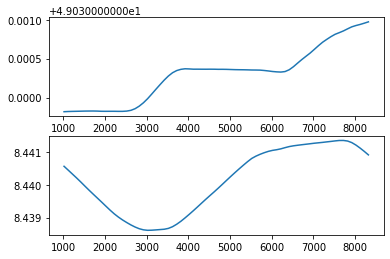

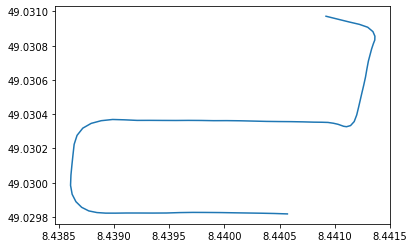

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(pd.read_hdf(save_path, f"{w_dataset.value}/{w_sequence.value}"))

lat, lon = df['lat'], df['lon']

fig1, ax = plt.subplots(2)
ax[0].plot(lat[::100])
ax[1].plot(lon[::100])

plt.figure()
plt.plot(lon[::100], lat[::100])

## Visualization of trajectories

In [5]:
import pandas as pd
import h5py
import ipywidgets as widgets

dataset = hdf.get(w_dataset.value)

# create widget to select lines
w_lines = widgets.SelectMultiple(
    options     = {k[4:-8]:k for k in list(dataset.keys())},  # [k[4:-8] for k in list(dataset.keys())],
    description = 'Select line(s):',
    disabled    = False)
display(w_lines)

SelectMultiple(description='Select line(s):', options={'2011_09_26_drive_0022': 'day_2011_09_26_drive_0022_ext…

In [29]:
import time
import utils
df_sel_lines = pd.DataFrame()
freq_samp = 50  # frequency of the BLOC_NAV message in Hz

for line in w_lines.value:
    line_df= pd.DataFrame(pd.read_hdf(save_path, f"{w_dataset.value}/{line}"))
    loc_list = df[['lat', 'lon']].values

    df_sel_lines = pd.concat([df_sel_lines, line_df[['lat', 'lon']]], axis=0)

duration = np.shape(df_sel_lines)[0]*(1/freq_samp)

print(f'Rows : {np.shape(df_sel_lines)[0]} | Columns : {np.shape(df_sel_lines)[1]} | Duration : {utils.to_hms(duration)}\n')


Rows : 189354 | Columns : 2 | Duration : 01h:03m:07s



In [13]:
# import des objets cartographiques
from ipyleaflet import (Map,
                        Icon,
                        Marker,
                        LocalTileLayer,
                        FullScreenControl,
                        MeasureControl,
                        Polyline,
                        MarkerCluster,
                        WidgetControl,
                        ScaleControl,
                        LegendControl)
# import objets d'interaction
from ipywidgets import HTML
import ipywidgets as widgets
# import outil calcul géodésique
from pyproj import Geod
# import pandas pour lecture csv
import pandas as pd

In [8]:
# fonctions utiles
geod = Geod(ellps="WGS84")
def length(latlon1, latlon2):
    """
    distance entre les points 1 et 2
    """
    lats = [latlon1[0], latlon2[0]]
    lons = [latlon1[1], latlon2[1]]
    return geod.line_length(lons, lats)

output = widgets.Output()
def disp_length(b):
    """
    affichage des distances via popup
    """
    with output:
        for marker in markers:
            # Reset
            marker.popup = None
            # Ecriture de la distance
            message = HTML()
            message.placeholder = "Some HTML"
            message.description = ""
            d = length(marker.location,
                       mark_tank.location)
            message.value = f"{d:.1f} m"
            marker.popup = message

def import_csv(file):
    "Import d'un fichier csv -> list"
    df = pd.read_csv(file)
    print(df.values.tolist())
    return df.values.tolist()

In [72]:
# carte
# center=(49.0649, 8.4526)
center=(49.01, 8.4056)
m = Map(center=center, zoom=13)
m.max_zoom = 18
m.min_zoom = 0

# fond de carte
# m.add_layer(LocalTileLayer(path='../data map/OsmTile/landscape/{z}/{x}/{y}.png'))
m.add_layer(LocalTileLayer(path='../data map/OsmTile/tiles/{z}/{x}/{y}.png'))

# icon tank
tank = Icon(icon_url='../data map/png/car.png',
            icon_size=[60, 30])
# mark_tank = Marker(location=(48.17238, -1.59610),
#                    icon=tank)
# m.add_layer(mark_tank)

# measure
measure = MeasureControl(
    position='bottomleft',
    active_color = 'orange',
    primary_length_unit = 'kilometers'
)
m.add_control(measure)
measure.completed_color = 'red'

# full Screen Control
m.add_control(FullScreenControl())

# echelle
m.add_control(ScaleControl(position='bottomright'))

# Polyline
legend = LegendControl({},name="Legend",position="topright")
step = 50
for line in w_lines.value:
    color = utils.get_random_color()

    line_df= pd.DataFrame(pd.read_hdf(save_path, f"{w_dataset.value}/{line}"))
    loc_list = line_df[['lat', 'lon']].values

    locations = (loc_list[:, :][::step, :]
                 .tolist())
    pline = Polyline(
        locations = locations,
        color     = color,
        fill      = False,
        opacity   = 0.75)
    m.add_layer(pline)
    legend.add_legend_element(str(line)[4:-8],color)
m.add_control(legend)

m

Map(center=[49.01, 8.4056], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [17]:
m.center

[49.00679876786164, 8.405579973045098]